In [1]:
def my_int( s ):
    num = 0
    for ch in s:
        num = num*10 + ord(ch) - ord('0')
    return num

# 1234 => 1*1000 + 2*100 + 3*10 + 4*1
s = "1234"
my_int(s) + 1

1235

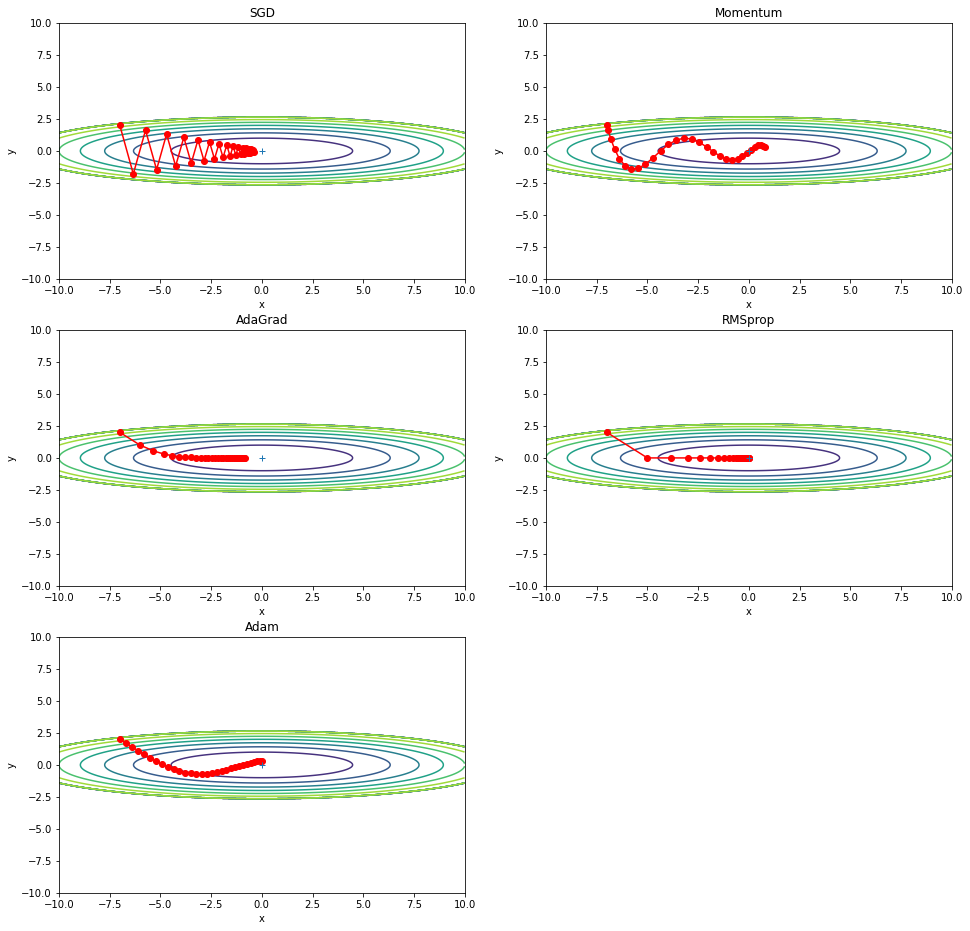

In [2]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2

# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (2.0, 2.0)
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.0)
optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.393377683508089
Momentum:2.3371369109875317
AdaGrad:2.5737937621307854
Adam:2.2571482225527832
===========iteration:100===========
SGD:1.7959227825849648
Momentum:0.2875853268612089
AdaGrad:0.1152258636575828
Adam:0.15835500670381317
===========iteration:200===========
SGD:1.0380459084707645
Momentum:0.45565558036994064
AdaGrad:0.17981822098616423
Adam:0.4085233652993172
===========iteration:300===========
SGD:0.594515840236123
Momentum:0.15410165158576883
AdaGrad:0.051707423123535795
Adam:0.1079227555943802
===========iteration:400===========
SGD:0.487470159250752
Momentum:0.23316826414928837
AdaGrad:0.08009061580476676
Adam:0.11806505241915499
===========iteration:500===========
SGD:0.3023525433996705
Momentum:0.16259899371744047
AdaGrad:0.05414722796564557
Adam:0.13483636689270107
===========iteration:600===========
SGD:0.33590433067886083
Momentum:0.15433337422220977
AdaGrad:0.0837919180141762
Adam:0.1253697059626701
===========iteration:700=

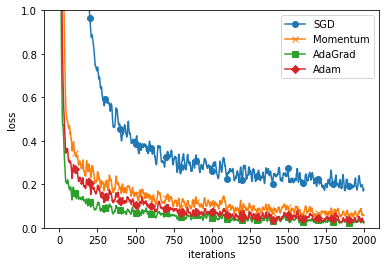

In [3]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### numpy random 함수

In [4]:
import numpy as np
a = np.random.randn(100000)
print(a)
print(np.mean(a))
print(np.std(a))

[ 0.72184053 -2.35542689  0.32072795 ...  0.3489908   0.12347919
 -0.35635701]
0.0010821061330904913
1.000703270839781


In [5]:
import numpy as np
a = np.random.randn(1000,1000)*0.01
print(np.mean(a))
print(np.std(a))

-1.2051537555103566e-06
0.009996749207306881


In [6]:
import numpy as np
a = np.random.uniform(low=-1.0, high=1.0, size=(10,10))
print(np.mean(a))
print(np.std(a))

-0.12255470795130897
0.5628085098647063


(1000, 100)


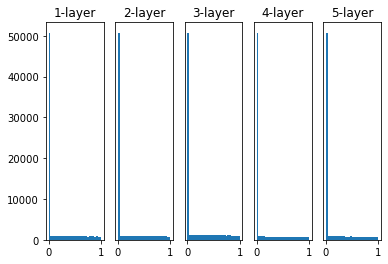

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

# test
#     w = np.random.uniform(low=-2.0, high=2.0, size=(100,100))  * np.sqrt(2.0 / node_num)  

    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.302437514985913
Xavier:2.2994767588746106
He:2.394438457346571
===========iteration:100===========
std=0.01:2.302656225484112
Xavier:2.223253183758551
He:1.6707551448912183
===========iteration:200===========
std=0.01:2.3016529217392026
Xavier:2.0397339136957076
He:0.9221495150417854
===========iteration:300===========
std=0.01:2.297676032249852
Xavier:1.6539515490113632
He:0.6122832055211889
===========iteration:400===========
std=0.01:2.299096066881308
Xavier:0.9624526120555215
He:0.3864489286812096
===========iteration:500===========
std=0.01:2.30027047519562
Xavier:0.8052896474997234
He:0.49140359754969326
===========iteration:600===========
std=0.01:2.2999074355451317
Xavier:0.6393146256626836
He:0.3689101209544178
===========iteration:700===========
std=0.01:2.3012199447155934
Xavier:0.6029357432641236
He:0.4107235582062324
===========iteration:800===========
std=0.01:2.3000025610331356
Xavier:0.3992657330978354
He:0.22637897550672703


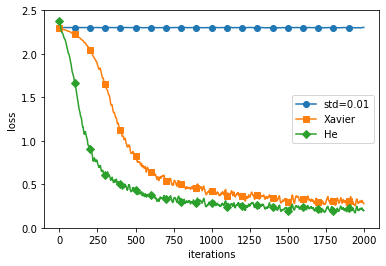

In [8]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 배치 정규화 테스트

In [9]:
x1 = np.array([1000, 3000, 2000, 5000, 7000])
print(x1)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(out)

[1000 3000 2000 5000 7000]
[-1.2070197  -0.27854301 -0.74278135  0.64993368  1.57841037]


In [10]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))

-3.637978807091713e-17
0.9999999999999999


In [11]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))
gamma = 2
beta = 1
y = out*gamma + beta
print(np.mean(y))
print(np.std(y))

-3.637978807091713e-17
0.9999999999999999
1.0
1.9999999999999998


In [12]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.056651979122968044
W3:0.0
b3:1.7990402263745597e-07


<Figure size 1152x1152 with 0 Axes>

In [13]:
a = np.logspace(0, -4, num=5, base=2)
a

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

In [14]:
a = np.logspace(0, 4, num=5, base=10)
a

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

============== 1/16 ==============
epoch:0 | 0.099 - 0.106
epoch:1 | 0.097 - 0.107
epoch:2 | 0.097 - 0.123
epoch:3 | 0.097 - 0.148
epoch:4 | 0.097 - 0.183
epoch:5 | 0.097 - 0.195
epoch:6 | 0.097 - 0.22
epoch:7 | 0.097 - 0.238
epoch:8 | 0.097 - 0.25
epoch:9 | 0.097 - 0.279
epoch:10 | 0.097 - 0.306
epoch:11 | 0.097 - 0.314
epoch:12 | 0.097 - 0.325
epoch:13 | 0.097 - 0.347
epoch:14 | 0.097 - 0.349
epoch:15 | 0.097 - 0.364
epoch:16 | 0.097 - 0.383
epoch:17 | 0.097 - 0.399
epoch:18 | 0.097 - 0.404
epoch:19 | 0.097 - 0.413


No handles with labels found to put in legend.
..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\jikim\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


============== 2/16 ==============
epoch:0 | 0.1 - 0.086
epoch:1 | 0.097 - 0.084
epoch:2 | 0.097 - 0.097
epoch:3 | 0.097 - 0.117
epoch:4 | 0.097 - 0.133
epoch:5 | 0.097 - 0.164
epoch:6 | 0.097 - 0.192
epoch:7 | 0.097 - 0.217
epoch:8 | 0.097 - 0.24
epoch:9 | 0.097 - 0.275
epoch:10 | 0.097 - 0.286
epoch:11 | 0.097 - 0.307
epoch:12 | 0.097 - 0.332
epoch:13 | 0.097 - 0.355
epoch:14 | 0.097 - 0.373
epoch:15 | 0.097 - 0.39
epoch:16 | 0.097 - 0.407
epoch:17 | 0.097 - 0.43
epoch:18 | 0.097 - 0.441


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.469
============== 3/16 ==============
epoch:0 | 0.13 - 0.073
epoch:1 | 0.354 - 0.123
epoch:2 | 0.48 - 0.178
epoch:3 | 0.574 - 0.206
epoch:4 | 0.658 - 0.242
epoch:5 | 0.712 - 0.281
epoch:6 | 0.746 - 0.323
epoch:7 | 0.802 - 0.351
epoch:8 | 0.804 - 0.388
epoch:9 | 0.857 - 0.421
epoch:10 | 0.889 - 0.453
epoch:11 | 0.893 - 0.479
epoch:12 | 0.919 - 0.507
epoch:13 | 0.928 - 0.537
epoch:14 | 0.938 - 0.55
epoch:15 | 0.944 - 0.563
epoch:16 | 0.955 - 0.585
epoch:17 | 0.956 - 0.6
epoch:18 | 0.963 - 0.609


No handles with labels found to put in legend.


epoch:19 | 0.968 - 0.634
============== 4/16 ==============
epoch:0 | 0.125 - 0.111
epoch:1 | 0.235 - 0.122
epoch:2 | 0.342 - 0.188
epoch:3 | 0.451 - 0.262
epoch:4 | 0.526 - 0.333
epoch:5 | 0.585 - 0.396
epoch:6 | 0.65 - 0.477
epoch:7 | 0.678 - 0.525
epoch:8 | 0.688 - 0.556
epoch:9 | 0.721 - 0.598
epoch:10 | 0.73 - 0.629
epoch:11 | 0.752 - 0.655
epoch:12 | 0.782 - 0.68
epoch:13 | 0.783 - 0.696
epoch:14 | 0.803 - 0.713
epoch:15 | 0.812 - 0.734
epoch:16 | 0.823 - 0.75
epoch:17 | 0.832 - 0.769
epoch:18 | 0.837 - 0.778
epoch:19 | 0.85 - 0.787


No handles with labels found to put in legend.


============== 5/16 ==============
epoch:0 | 0.112 - 0.104
epoch:1 | 0.125 - 0.17
epoch:2 | 0.123 - 0.322
epoch:3 | 0.131 - 0.457
epoch:4 | 0.148 - 0.53
epoch:5 | 0.161 - 0.599
epoch:6 | 0.165 - 0.65
epoch:7 | 0.194 - 0.698
epoch:8 | 0.216 - 0.731
epoch:9 | 0.229 - 0.754
epoch:10 | 0.247 - 0.783
epoch:11 | 0.258 - 0.8
epoch:12 | 0.259 - 0.823
epoch:13 | 0.275 - 0.842
epoch:14 | 0.302 - 0.848
epoch:15 | 0.282 - 0.869
epoch:16 | 0.3 - 0.872
epoch:17 | 0.307 - 0.883
epoch:18 | 0.31 - 0.89
epoch:19 | 0.318 - 0.902


No handles with labels found to put in legend.


============== 6/16 ==============
epoch:0 | 0.049 - 0.093
epoch:1 | 0.111 - 0.171
epoch:2 | 0.166 - 0.419
epoch:3 | 0.137 - 0.561
epoch:4 | 0.149 - 0.654
epoch:5 | 0.131 - 0.715
epoch:6 | 0.173 - 0.751
epoch:7 | 0.123 - 0.77
epoch:8 | 0.117 - 0.798
epoch:9 | 0.123 - 0.828
epoch:10 | 0.117 - 0.84
epoch:11 | 0.12 - 0.847
epoch:12 | 0.117 - 0.87
epoch:13 | 0.15 - 0.888
epoch:14 | 0.12 - 0.894
epoch:15 | 0.117 - 0.901
epoch:16 | 0.117 - 0.92
epoch:17 | 0.117 - 0.925
epoch:18 | 0.117 - 0.939
epoch:19 | 0.117 - 0.941


No handles with labels found to put in legend.


============== 7/16 ==============
epoch:0 | 0.099 - 0.114
epoch:1 | 0.105 - 0.253
epoch:2 | 0.116 - 0.638
epoch:3 | 0.116 - 0.739
epoch:4 | 0.116 - 0.775
epoch:5 | 0.116 - 0.811
epoch:6 | 0.116 - 0.839
epoch:7 | 0.116 - 0.87
epoch:8 | 0.116 - 0.898
epoch:9 | 0.116 - 0.914
epoch:10 | 0.116 - 0.928
epoch:11 | 0.116 - 0.939
epoch:12 | 0.116 - 0.954
epoch:13 | 0.116 - 0.96
epoch:14 | 0.116 - 0.965
epoch:15 | 0.116 - 0.975
epoch:16 | 0.116 - 0.98
epoch:17 | 0.116 - 0.982
epoch:18 | 0.116 - 0.987


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.991
============== 8/16 ==============
epoch:0 | 0.1 - 0.122
epoch:1 | 0.116 - 0.423
epoch:2 | 0.117 - 0.743
epoch:3 | 0.116 - 0.829
epoch:4 | 0.116 - 0.882
epoch:5 | 0.116 - 0.915
epoch:6 | 0.116 - 0.936
epoch:7 | 0.116 - 0.957
epoch:8 | 0.116 - 0.974
epoch:9 | 0.116 - 0.978
epoch:10 | 0.116 - 0.982
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.989
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.993
epoch:15 | 0.116 - 0.993
epoch:16 | 0.116 - 0.995
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.117 - 0.113
epoch:1 | 0.097 - 0.456
epoch:2 | 0.117 - 0.733
epoch:3 | 0.117 - 0.801
epoch:4 | 0.117 - 0.858
epoch:5 | 0.117 - 0.908
epoch:6 | 0.117 - 0.928
epoch:7 | 0.117 - 0.968
epoch:8 | 0.117 - 0.98
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0


No handles with labels found to put in legend.


============== 10/16 ==============
epoch:0 | 0.117 - 0.186
epoch:1 | 0.117 - 0.555
epoch:2 | 0.117 - 0.808
epoch:3 | 0.117 - 0.835
epoch:4 | 0.117 - 0.82
epoch:5 | 0.117 - 0.861
epoch:6 | 0.117 - 0.879
epoch:7 | 0.117 - 0.952
epoch:8 | 0.117 - 0.969
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.986
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.863
epoch:16 | 0.117 - 0.986
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 11/16 ==============
epoch:0 | 0.097 - 0.192
epoch:1 | 0.116 - 0.557
epoch:2 | 0.116 - 0.6
epoch:3 | 0.116 - 0.747
epoch:4 | 0.116 - 0.819
epoch:5 | 0.116 - 0.844
epoch:6 | 0.116 - 0.863
epoch:7 | 0.116 - 0.864
epoch:8 | 0.117 - 0.933
epoch:9 | 0.117 - 0.947
epoch:10 | 0.117 - 0.985
epoch:11 | 0.117 - 0.986
epoch:12 | 0.117 - 0.982
epoch:13 | 0.117 - 0.988
epoch:14 | 0.117 - 0.989
epoch:15 | 0.117 - 0.866
epoch:16 | 0.117 - 0.98
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.989


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.992
============== 12/16 ==============
epoch:0 | 0.105 - 0.15
epoch:1 | 0.116 - 0.454
epoch:2 | 0.105 - 0.563
epoch:3 | 0.116 - 0.639
epoch:4 | 0.116 - 0.671
epoch:5 | 0.116 - 0.679
epoch:6 | 0.116 - 0.763
epoch:7 | 0.116 - 0.779
epoch:8 | 0.117 - 0.791
epoch:9 | 0.116 - 0.759
epoch:10 | 0.117 - 0.772
epoch:11 | 0.117 - 0.796
epoch:12 | 0.117 - 0.798
epoch:13 | 0.117 - 0.798
epoch:14 | 0.117 - 0.797
epoch:15 | 0.117 - 0.68
epoch:16 | 0.117 - 0.792
epoch:17 | 0.117 - 0.798
epoch:18 | 0.117 - 0.802
epoch:19 | 0.117 - 0.803


No handles with labels found to put in legend.


============== 13/16 ==============
epoch:0 | 0.105 - 0.332
epoch:1 | 0.105 - 0.354
epoch:2 | 0.117 - 0.527
epoch:3 | 0.117 - 0.636
epoch:4 | 0.117 - 0.655
epoch:5 | 0.117 - 0.674
epoch:6 | 0.117 - 0.684
epoch:7 | 0.117 - 0.7
epoch:8 | 0.117 - 0.699
epoch:9 | 0.117 - 0.696
epoch:10 | 0.117 - 0.762
epoch:11 | 0.117 - 0.756
epoch:12 | 0.117 - 0.714
epoch:13 | 0.117 - 0.795
epoch:14 | 0.117 - 0.792
epoch:15 | 0.117 - 0.798
epoch:16 | 0.117 - 0.79
epoch:17 | 0.117 - 0.787
epoch:18 | 0.117 - 0.804


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.753
============== 14/16 ==============
epoch:0 | 0.116 - 0.097
epoch:1 | 0.116 - 0.408
epoch:2 | 0.116 - 0.416
epoch:3 | 0.116 - 0.419
epoch:4 | 0.116 - 0.49
epoch:5 | 0.116 - 0.484
epoch:6 | 0.116 - 0.478
epoch:7 | 0.116 - 0.49
epoch:8 | 0.116 - 0.5
epoch:9 | 0.116 - 0.503
epoch:10 | 0.116 - 0.51
epoch:11 | 0.116 - 0.499
epoch:12 | 0.116 - 0.503
epoch:13 | 0.116 - 0.509
epoch:14 | 0.116 - 0.51
epoch:15 | 0.116 - 0.499
epoch:16 | 0.116 - 0.508
epoch:17 | 0.116 - 0.526
epoch:18 | 0.116 - 0.518


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.494
============== 15/16 ==============
epoch:0 | 0.094 - 0.121
epoch:1 | 0.116 - 0.367
epoch:2 | 0.116 - 0.326
epoch:3 | 0.116 - 0.484
epoch:4 | 0.116 - 0.494
epoch:5 | 0.116 - 0.495
epoch:6 | 0.116 - 0.503
epoch:7 | 0.116 - 0.49
epoch:8 | 0.116 - 0.514
epoch:9 | 0.116 - 0.519
epoch:10 | 0.116 - 0.511
epoch:11 | 0.116 - 0.505
epoch:12 | 0.116 - 0.519
epoch:13 | 0.116 - 0.513
epoch:14 | 0.116 - 0.519
epoch:15 | 0.116 - 0.52
epoch:16 | 0.116 - 0.457
epoch:17 | 0.116 - 0.508
epoch:18 | 0.116 - 0.512
epoch:19 | 0.116 - 0.522


No handles with labels found to put in legend.


============== 16/16 ==============
epoch:0 | 0.117 - 0.192
epoch:1 | 0.117 - 0.196
epoch:2 | 0.117 - 0.281
epoch:3 | 0.117 - 0.303
epoch:4 | 0.117 - 0.329
epoch:5 | 0.117 - 0.328
epoch:6 | 0.117 - 0.329
epoch:7 | 0.117 - 0.329
epoch:8 | 0.117 - 0.328
epoch:9 | 0.117 - 0.375
epoch:10 | 0.117 - 0.4
epoch:11 | 0.116 - 0.412
epoch:12 | 0.117 - 0.37
epoch:13 | 0.117 - 0.41
epoch:14 | 0.117 - 0.421
epoch:15 | 0.117 - 0.411
epoch:16 | 0.117 - 0.416
epoch:17 | 0.117 - 0.43
epoch:18 | 0.117 - 0.432
epoch:19 | 0.117 - 0.4


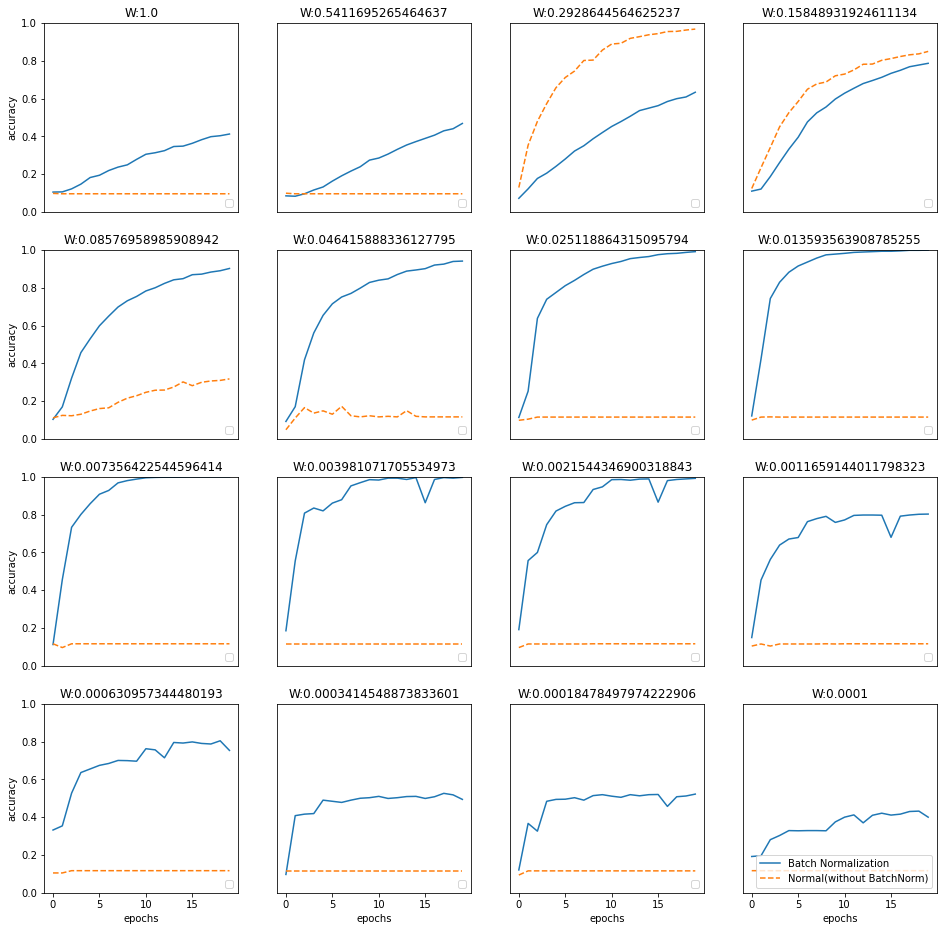

In [15]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.15, test acc:0.1197
epoch:1, train acc:0.17333333333333334, test acc:0.1386
epoch:2, train acc:0.19333333333333333, test acc:0.154
epoch:3, train acc:0.22666666666666666, test acc:0.1668
epoch:4, train acc:0.25, test acc:0.18
epoch:5, train acc:0.25666666666666665, test acc:0.1893
epoch:6, train acc:0.25666666666666665, test acc:0.2004
epoch:7, train acc:0.2633333333333333, test acc:0.2085
epoch:8, train acc:0.2966666666666667, test acc:0.2231
epoch:9, train acc:0.31666666666666665, test acc:0.2373
epoch:10, train acc:0.3233333333333333, test acc:0.2497
epoch:11, train acc:0.3433333333333333, test acc:0.271
epoch:12, train acc:0.36, test acc:0.2823
epoch:13, train acc:0.38333333333333336, test acc:0.3007
epoch:14, train acc:0.4066666666666667, test acc:0.327
epoch:15, train acc:0.42, test acc:0.3412
epoch:16, train acc:0.46, test acc:0.3704
epoch:17, train acc:0.4766666666666667, test acc:0.3869
epoch:18, train acc:0.5333333333333333, test acc:0.4168
epoch:19, trai

epoch:165, train acc:1.0, test acc:0.7413
epoch:166, train acc:1.0, test acc:0.7414
epoch:167, train acc:1.0, test acc:0.7422
epoch:168, train acc:1.0, test acc:0.7423
epoch:169, train acc:1.0, test acc:0.741
epoch:170, train acc:1.0, test acc:0.7418
epoch:171, train acc:1.0, test acc:0.7423
epoch:172, train acc:1.0, test acc:0.7409
epoch:173, train acc:1.0, test acc:0.7423
epoch:174, train acc:1.0, test acc:0.7426
epoch:175, train acc:1.0, test acc:0.7435
epoch:176, train acc:1.0, test acc:0.7436
epoch:177, train acc:1.0, test acc:0.7442
epoch:178, train acc:1.0, test acc:0.7444
epoch:179, train acc:1.0, test acc:0.7438
epoch:180, train acc:1.0, test acc:0.7432
epoch:181, train acc:1.0, test acc:0.7441
epoch:182, train acc:1.0, test acc:0.7416
epoch:183, train acc:1.0, test acc:0.743
epoch:184, train acc:1.0, test acc:0.7438
epoch:185, train acc:1.0, test acc:0.7445
epoch:186, train acc:1.0, test acc:0.7441
epoch:187, train acc:1.0, test acc:0.742
epoch:188, train acc:1.0, test acc:0.

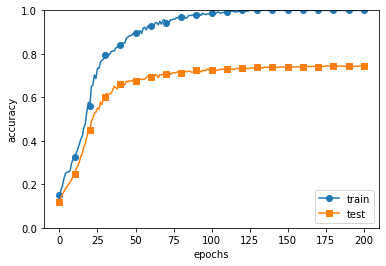

In [17]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

In [27]:
import numpy as np
x = (600,500)
# x = (6,5)
# a,b = x
# print(a,b)
# print(x)
# print(*x)
a = np.random.rand(*x)  # np.random.rand( (6,5) ) =>  np.random.rand( 6, 5 ) 
# print(a)
print(np.mean(a))
print(np.max(a))
print(np.min(a))

0.5007596686698659
0.9999976310811144
3.3933857872536777e-06


In [67]:
import numpy as np
x = np.arange(30).reshape((6,5))
print(x)
print(x.shape)
mask = np.random.rand(*x.shape)
print(mask)
mask = mask > 0.2
print(mask)
print(mask.shape)
print(np.mean(mask))
# print(x * mask)
x *= mask
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
(6, 5)
[[0.78124005 0.64913565 0.82764991 0.19492652 0.95391974]
 [0.64019612 0.20385696 0.43624916 0.54036496 0.13264438]
 [0.21060518 0.03830995 0.3900085  0.08736456 0.42499813]
 [0.18733592 0.79266331 0.97602523 0.78231983 0.06814043]
 [0.50371389 0.71893876 0.06327316 0.6824651  0.77107583]
 [0.27025183 0.23344608 0.30358283 0.41637551 0.81706568]]
[[ True  True  True False  True]
 [ True  True  True  True False]
 [ True False  True False  True]
 [False  True  True  True False]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
(6, 5)
0.7666666666666667
[[ 0  1  2  0  4]
 [ 5  6  7  8  0]
 [10  0 12  0 14]
 [ 0 16 17 18  0]
 [20 21  0 23 24]
 [25 26 27 28 29]]


train loss:2.3104111797177422
=== epoch:1, train acc:0.11, test acc:0.1002 ===
train loss:2.3090166151475886
train loss:2.287147135244875
train loss:2.300696914219703
=== epoch:2, train acc:0.11, test acc:0.1012 ===
train loss:2.3111962929205405
train loss:2.320955401232732
train loss:2.29374267100443
=== epoch:3, train acc:0.11, test acc:0.1023 ===
train loss:2.3175238722155016
train loss:2.310947296244984
train loss:2.321974949981103
=== epoch:4, train acc:0.11, test acc:0.1031 ===
train loss:2.3062442203972537
train loss:2.3035999010092056
train loss:2.2860594311981166
=== epoch:5, train acc:0.11, test acc:0.1026 ===
train loss:2.311796990570554
train loss:2.3028614812664228
train loss:2.3009968814724284
=== epoch:6, train acc:0.11333333333333333, test acc:0.1037 ===
train loss:2.3047298176115047
train loss:2.29871070631517
train loss:2.283769958702019
=== epoch:7, train acc:0.11, test acc:0.1045 ===
train loss:2.306539240874145
train loss:2.302317744359132
train loss:2.294373544250

=== epoch:58, train acc:0.33666666666666667, test acc:0.3063 ===
train loss:2.2303591119368447
train loss:2.2217945816249074
train loss:2.2256315569555274
=== epoch:59, train acc:0.33666666666666667, test acc:0.3052 ===
train loss:2.23321473870563
train loss:2.230238234094149
train loss:2.2605905330858946
=== epoch:60, train acc:0.3333333333333333, test acc:0.3073 ===
train loss:2.2378552273860155
train loss:2.2356893167006517
train loss:2.231475152154647
=== epoch:61, train acc:0.3466666666666667, test acc:0.3073 ===
train loss:2.245557276120415
train loss:2.2364893650292417
train loss:2.2468695603922004
=== epoch:62, train acc:0.3433333333333333, test acc:0.3081 ===
train loss:2.2551348039206376
train loss:2.2308381026756647
train loss:2.2290220969486665
=== epoch:63, train acc:0.35, test acc:0.3119 ===
train loss:2.244450351017436
train loss:2.230505619843246
train loss:2.2386087562561103
=== epoch:64, train acc:0.35, test acc:0.3095 ===
train loss:2.2403033475377034
train loss:2.21

=== epoch:114, train acc:0.4166666666666667, test acc:0.339 ===
train loss:2.1266545251026874
train loss:2.09307121087575
train loss:2.1405177604711456
=== epoch:115, train acc:0.41333333333333333, test acc:0.3396 ===
train loss:2.155440969618981
train loss:2.131379378197922
train loss:2.1182096689339227
=== epoch:116, train acc:0.42, test acc:0.3438 ===
train loss:2.1181091906057516
train loss:2.1286309541957347
train loss:2.1352571602241066
=== epoch:117, train acc:0.4166666666666667, test acc:0.3416 ===
train loss:2.1004971880059475
train loss:2.1181950137417767
train loss:2.097592287616843
=== epoch:118, train acc:0.42, test acc:0.3443 ===
train loss:2.1239008462615163
train loss:2.131348027938764
train loss:2.12095874167675
=== epoch:119, train acc:0.42333333333333334, test acc:0.3456 ===
train loss:2.12019927201299
train loss:2.125788419745925
train loss:2.0871912620932163
=== epoch:120, train acc:0.42, test acc:0.3453 ===
train loss:2.0995705354821923
train loss:2.09011147870926

=== epoch:170, train acc:0.45, test acc:0.3869 ===
train loss:1.8421919322492615
train loss:1.8970636692802703
train loss:1.9155346927071557
=== epoch:171, train acc:0.4666666666666667, test acc:0.3892 ===
train loss:1.8039764966405816
train loss:1.823373638978069
train loss:1.787868592850005
=== epoch:172, train acc:0.46, test acc:0.3878 ===
train loss:1.9027218355560287
train loss:1.8884150349640458
train loss:1.8171397585450948
=== epoch:173, train acc:0.47333333333333333, test acc:0.3924 ===
train loss:1.8356092710110647
train loss:1.6958831736597149
train loss:1.8290179402765638
=== epoch:174, train acc:0.4766666666666667, test acc:0.3925 ===
train loss:1.8438320187002335
train loss:1.8111270039607816
train loss:1.8445097159906203
=== epoch:175, train acc:0.47, test acc:0.3946 ===
train loss:1.8698084810654112
train loss:1.8207808771502523
train loss:1.8354988708096152
=== epoch:176, train acc:0.46, test acc:0.3893 ===
train loss:1.8168118489783474
train loss:1.8055054037812122
tr

=== epoch:226, train acc:0.5866666666666667, test acc:0.453 ===
train loss:1.4758893947449696
train loss:1.5453729919785124
train loss:1.6367130419544396
=== epoch:227, train acc:0.5733333333333334, test acc:0.4509 ===
train loss:1.4432924386688293
train loss:1.546776775605614
train loss:1.4744473187343214
=== epoch:228, train acc:0.5566666666666666, test acc:0.4508 ===
train loss:1.5447628419526434
train loss:1.5210366378975357
train loss:1.4854900086936416
=== epoch:229, train acc:0.5766666666666667, test acc:0.4537 ===
train loss:1.4296617296885576
train loss:1.5607255730154512
train loss:1.4186334748081457
=== epoch:230, train acc:0.58, test acc:0.4577 ===
train loss:1.5656218337450432
train loss:1.3688982023628427
train loss:1.4398949978520321
=== epoch:231, train acc:0.5833333333333334, test acc:0.4585 ===
train loss:1.4392880643654409
train loss:1.4594506807413206
train loss:1.4662176802304152
=== epoch:232, train acc:0.5733333333333334, test acc:0.4563 ===
train loss:1.53977022

=== epoch:282, train acc:0.68, test acc:0.5191 ===
train loss:1.027543104774727
train loss:1.1234636055367948
train loss:1.2038241721874448
=== epoch:283, train acc:0.6966666666666667, test acc:0.5304 ===
train loss:1.1710533778834296
train loss:1.2312953806529443
train loss:1.1175114503701042
=== epoch:284, train acc:0.7033333333333334, test acc:0.5326 ===
train loss:1.2078751189656731
train loss:1.084046705742744
train loss:1.2230249870876404
=== epoch:285, train acc:0.6966666666666667, test acc:0.5278 ===
train loss:1.190110189874905
train loss:1.141807061281563
train loss:1.1219567903242311
=== epoch:286, train acc:0.7033333333333334, test acc:0.5364 ===
train loss:1.240434907583415
train loss:1.1182093195659852
train loss:1.0828253119581752
=== epoch:287, train acc:0.6966666666666667, test acc:0.5309 ===
train loss:1.2393799949250792
train loss:1.1421889473817743
train loss:1.140025628591898
=== epoch:288, train acc:0.6966666666666667, test acc:0.5334 ===
train loss:1.098749632959

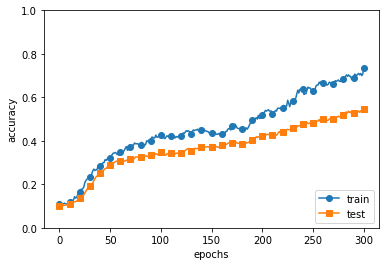

In [53]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

val acc:0.76 | lr:0.009148199165414608, weight decay:8.662597697273085e-06
val acc:0.13 | lr:0.0006936255480032815, weight decay:6.99591505427695e-05
val acc:0.07 | lr:7.50374092510703e-05, weight decay:2.136385282541291e-08
val acc:0.12 | lr:6.44737803725635e-06, weight decay:1.0755551923890743e-05
val acc:0.14 | lr:0.0005620055256653147, weight decay:2.057016177290107e-07
val acc:0.08 | lr:4.1881631002605094e-05, weight decay:5.694119296522235e-06
val acc:0.75 | lr:0.008057119100822125, weight decay:1.9857873177979526e-08
val acc:0.15 | lr:1.2216926461113917e-05, weight decay:2.3574866759128478e-08
val acc:0.11 | lr:1.0411642947497446e-06, weight decay:1.0226508484864606e-05
val acc:0.11 | lr:0.0003217100468845136, weight decay:1.3183528730543645e-07
val acc:0.23 | lr:0.00073669877727852, weight decay:6.399609300076623e-06
val acc:0.11 | lr:1.274647565262278e-05, weight decay:2.2693366390506056e-06
val acc:0.07 | lr:0.00020793235100092378, weight decay:1.6499231574945383e-05
val acc: